In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import random
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
SEED = 1234
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/mobile_re.csv')

In [ ]:
dataset

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0
...,...,...,...,...,...,...,...,...
67981,B081H6STQQ,jande,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0
67982,B081H6STQQ,2cool4u,5,"September 14, 2019",False,Simply Amazing!,I've been an Xperia user for several years and...,1.0
67983,B081H6STQQ,simon,5,"July 14, 2019",False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,NaN
67984,B081TJFVCJ,Tobiasz Jedrysiak,5,"December 24, 2019",True,Phone is like new,Product looks and works like new. Very much re...,NaN


In [ ]:
dataset=dataset[['body','rating']]

In [ ]:
len(dataset)

67986

In [ ]:
#Python3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})

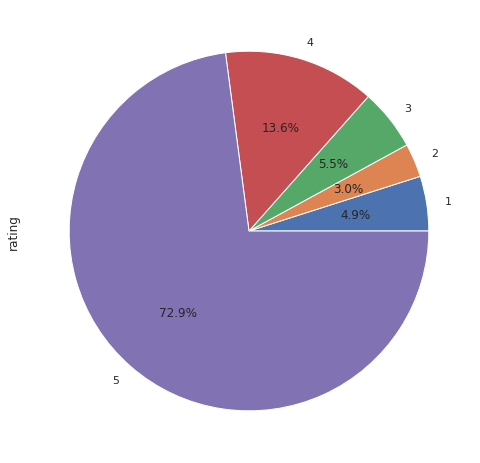

In [ ]:
dataset.groupby("rating")["rating"].sum().plot.pie(autopct="%.1f%%");

In [ ]:
pos_data=dataset[dataset.rating==5]
neg_data=dataset[dataset.rating<3]
pos_data['rating']=1
neg_data['rating']=0
my_data=pd.concat([pos_data[:20000],neg_data])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
len(neg_data)

16658

In [ ]:
data=my_data.body.astype(str)
label=my_data.rating

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    label,
                                                    shuffle=True,
                                                    random_state=0)

# **classic**

**library**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import MultinomialNB

**input**

In [ ]:
train_1 = CountVectorizer().fit(X_train).transform(X_train)
train_2 = CountVectorizer(ngram_range=(1,2)).fit(X_train).transform(X_train)
train_3 = CountVectorizer(ngram_range=(2,3)).fit(X_train).transform(X_train)
test1 = CountVectorizer().fit(X_train).transform(X_test)
test2= CountVectorizer(ngram_range=(1,2)).fit(X_train).transform(X_test)
test3 = CountVectorizer(ngram_range=(2,3)).fit(X_train).transform(X_test)

**svm**

In [ ]:
model = SVC()
model.fit(train_1, y_train)
# Predict the transformed test documents
predictions = model.predict(test1)

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9058667382351747


In [ ]:
per,re,f,_=precision_recall_fscore_support(y_test, predictions, average='binary')

In [ ]:
model = SVC(kernel='poly')
model.fit(train_1, y_train)
# Predict the transformed test documents
predictions = model.predict(test1)

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.6079662064330467


In [ ]:
per,re,f,_=precision_recall_fscore_support(y_test, predictions, average='binary')

In [ ]:
model = SVC()
model.fit(train_2, y_train)
# Predict the transformed test documents
predictions = model.predict(test2)

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9095575532591488


In [ ]:
per,re,f,_=precision_recall_fscore_support(y_test, predictions, average='binary')

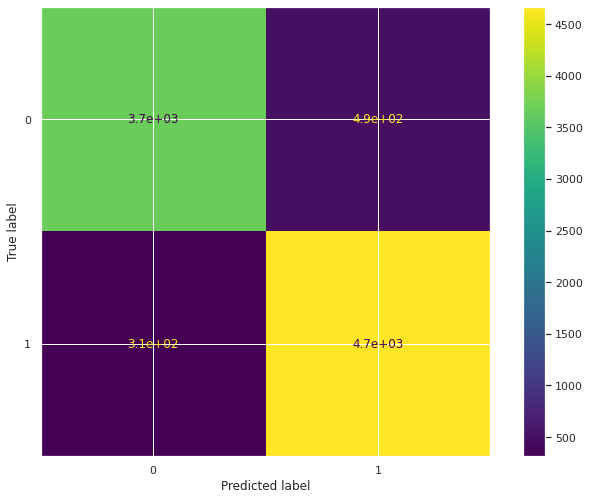

In [ ]:
plot_confusion_matrix(model, test2,np.array(y_test).reshape(-1,1))
plt.show()

In [ ]:
model = SVC(kernel='poly')
model.fit(train_2, y_train)
# Predict the transformed test documents
predictions = model.predict(test2)

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.6003646836476484


In [ ]:
per,re,f,_=precision_recall_fscore_support(y_test, predictions, average='binary')

In [ ]:
model = SVC()
model.fit(train_3, y_train)
# Predict the transformed test documents
predictions = model.predict(test3)

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.8356713381657112


In [ ]:
per,re,f,_=precision_recall_fscore_support(y_test, predictions, average='binary')

In [ ]:
model = SVC(kernel='poly')
model.fit(train_3, y_train)
# Predict the transformed test documents
predictions = model.predict(test3)

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.5177233546384963


In [ ]:
per,re,f,_=precision_recall_fscore_support(y_test, predictions, average='binary')

**naive bayse**

In [ ]:
# Train the model
model = LogisticRegression()
model.fit(train_1, y_train)

predictions = model.predict(test1)

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9250763422478225


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
per,re,f,_=precision_recall_fscore_support(y_test, predictions, average='binary')

In [ ]:
# Train the model
model = LogisticRegression()
model.fit(train_2, y_train)

predictions = model.predict(test2)

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9352590674743684


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
per,re,f,_=precision_recall_fscore_support(y_test, predictions, average='binary')

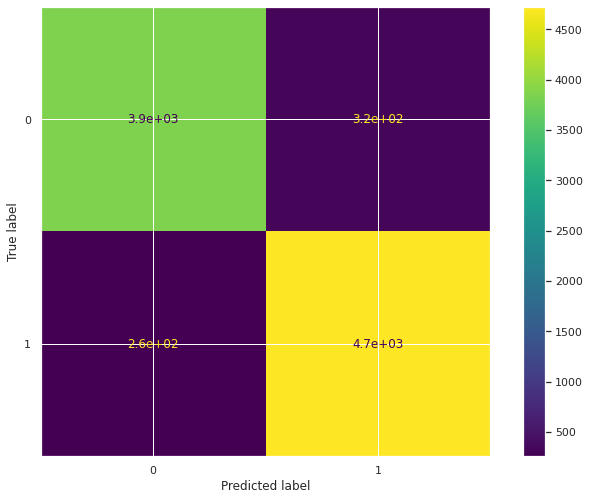

In [ ]:
plot_confusion_matrix(model, test2,np.array(y_test).reshape(-1,1))
plt.show()

In [ ]:
# Train the model
model = LogisticRegression()
model.fit(train_3, y_train)

predictions = model.predict(test3)

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.8968996251674569


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**logisticRegresion**

In [ ]:
per,re,f,_=precision_recall_fscore_support(y_test, predictions, average='binary')

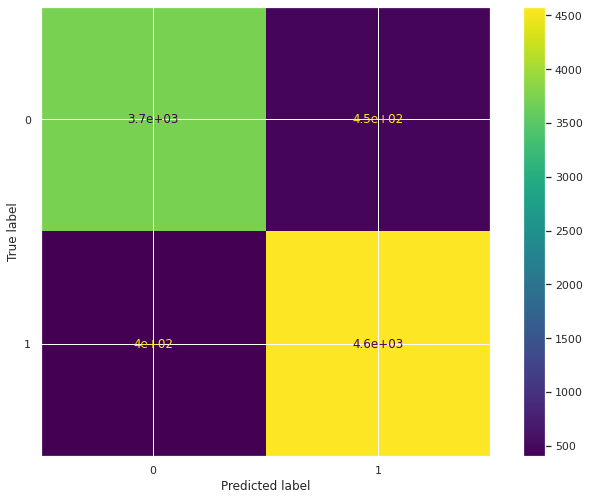

In [ ]:
clf = MultinomialNB().fit(train_1, y_train)
plot_confusion_matrix(clf, test1,np.array(y_test).reshape(-1,1))
plt.show()

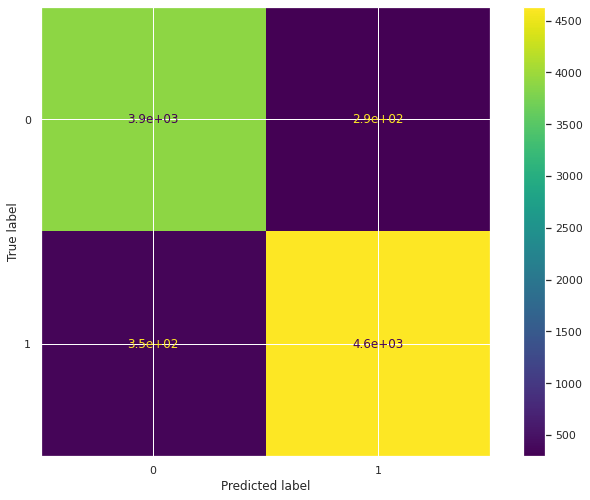

In [ ]:
clf = MultinomialNB().fit(train_2, y_train)
plot_confusion_matrix(clf, test2,np.array(y_test).reshape(-1,1))
plt.show()

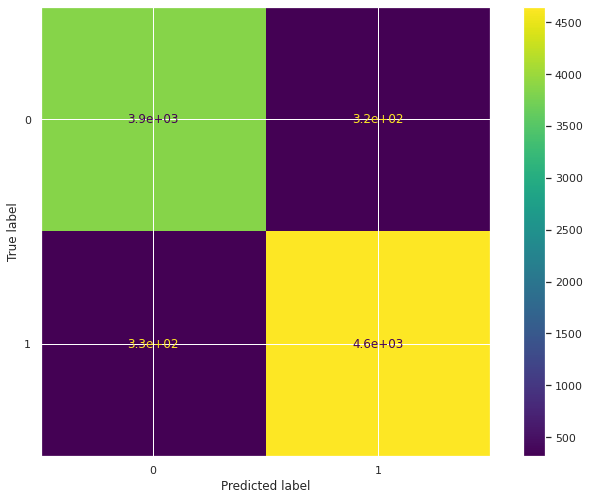

In [ ]:
clf = MultinomialNB().fit(train_3, y_train)
plot_confusion_matrix(clf, test3,np.array(y_test).reshape(-1,1))
plt.show()

In [ ]:
per,re,f,_=precision_recall_fscore_support(y_test, predictions, average='binary')